# 3.4 주식 비교하기

### 1. 야후 파이낸스로 주식 시세 구하기
##### 국내 기업 주식 데이터 조회 -> 6자리 종목코드 + [.KS(코스피) or .KQ(코스닥)]

In [1]:
# !pip install yfinance

In [2]:
# !pip install pandas-datareader

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [4]:
sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT',start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997


In [17]:
tmp_msft=msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-12-16,214.750000,220.110001,214.720001,219.279999,219.279999
2020-12-17,219.869995,220.889999,217.919998,219.419998,219.419998
2020-12-18,218.589996,219.690002,216.020004,218.589996,218.589996
2020-12-21,217.550003,224.000000,217.279999,222.589996,222.589996
2020-12-22,222.690002,225.630005,221.850006,223.940002,223.940002


In [19]:
sec.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-17,97000.0,97800.0,96000.0,96900.0,96900.0,1038351
2020-12-18,97300.0,97400.0,95700.0,95800.0,95800.0,835663
2020-12-21,95800.0,95900.0,93600.0,94900.0,94900.0,946927
2020-12-22,94600.0,94700.0,91800.0,92200.0,92200.0,943385
2020-12-23,92700.0,119500.0,91100.0,119500.0,119500.0,16553003


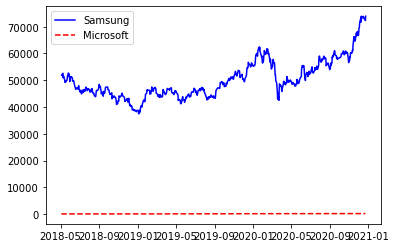

In [13]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close, 'b', label='Samsung')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

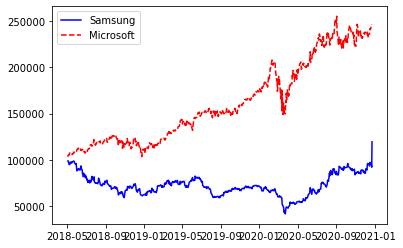

In [20]:
import matplotlib.pyplot as plt
plt.plot(sec.index, sec.Close, 'b', label='Samsung')
plt.plot(msft.index, msft.Close*1100, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

---

### 2. 일간 변동률로 주가 비교하기
##### -  Ri(오늘 변동률) = {[Ri(오늘종가) - Ri-1(어제 종가)] / Ri-1(어제 종가) } * 100
##### -  Ri(오늘 변동률) = {[Ri(오늘 종가) / Ri-1(어제 종가)] -1} * 100

In [15]:
sec['Close'].shift(1) #.shift(n) -> 전체 데이터가 n행씩 뒤로 이동

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2020-12-17    73800.0
2020-12-18    73300.0
2020-12-21    73000.0
2020-12-22    73000.0
2020-12-23    72300.0
Name: Close, Length: 648, dtype: float64

In [17]:
sec_dpc = (sec['Close']/sec['Close'].shift(1)-1)*100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [18]:
sec_dpc.iloc[0]=0  #NaN을 0으로 변경
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

---

### 3. 주가 일간 변동률 히스토그램

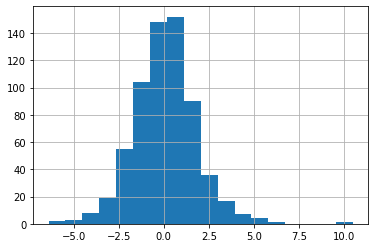

In [20]:
import matplotlib.pyplot as plt
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0]
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [21]:
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [22]:
sec_dpc.describe()

count    647.000000
mean       0.069821
std        1.747351
min       -6.387665
25%       -0.993377
50%        0.106383
75%        1.040849
max       10.470588
Name: Close, dtype: float64

------

### 4. 일간 변동률 누적합 구하기
* Cumulative sum - 누적합

In [23]:
sec_dpc_cs = sec_dpc.cumsum() #일간 변동률의 누적합
sec_dpc_cs

Date
2018-05-04          NaN
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-12-17    44.329249
2020-12-18    43.919972
2020-12-21    43.919972
2020-12-22    42.961068
2020-12-23    45.174069
Name: Close, Length: 648, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


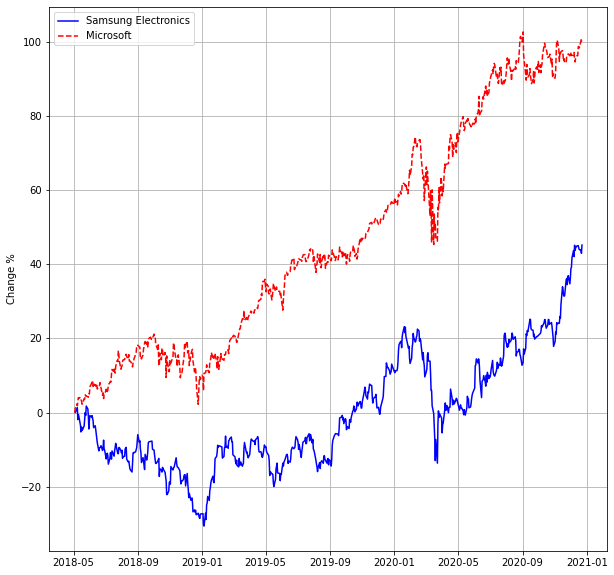

In [25]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0]=0
sec_dpc_cs = sec_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT',start='2018-05-04')
msft_dpc = (msft['Close']-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0]=0
msft_dpc_cs = msft_dpc.cumsum()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

---

### 5. 최대 손실 낙폭
* MDD(Maximum Drawdown) - 최대 손실 낙폭
##### MDD = (최저점 - 최고점 ) / 최저점

[*********************100%***********************]  1 of 1 completed


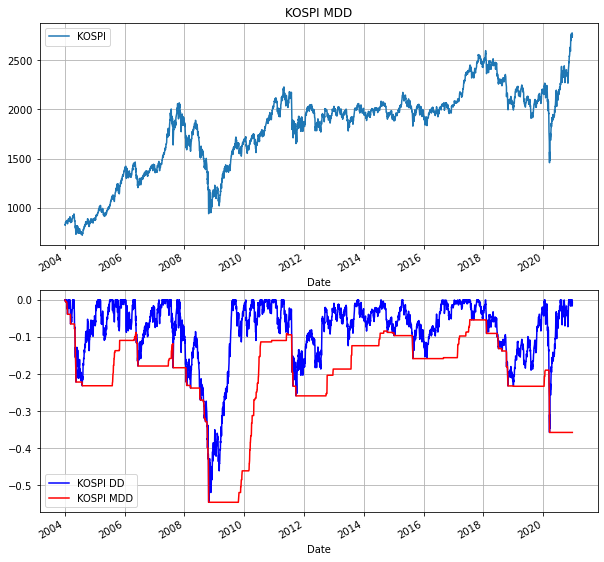

In [36]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252  #개장일을 252일로 어림잡음
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()    # 1년 기간 단위로 최고치 peak를 구함
drawdown = kospi['Adj Close']/peak - 1.0    # peak대비 현재 KOSPI종가가 얼마나 하락했는지
max_dd = drawdown.rolling(window, min_periods=1).min()  #1년 기간 단위로 최저치 max_dd

plt.figure(figsize=(10,10))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [37]:
max_dd.min()

-0.5453665130144085

In [38]:
max_dd[max_dd==max_dd.min()]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

---

### 6. 회귀분석과 상관관계

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


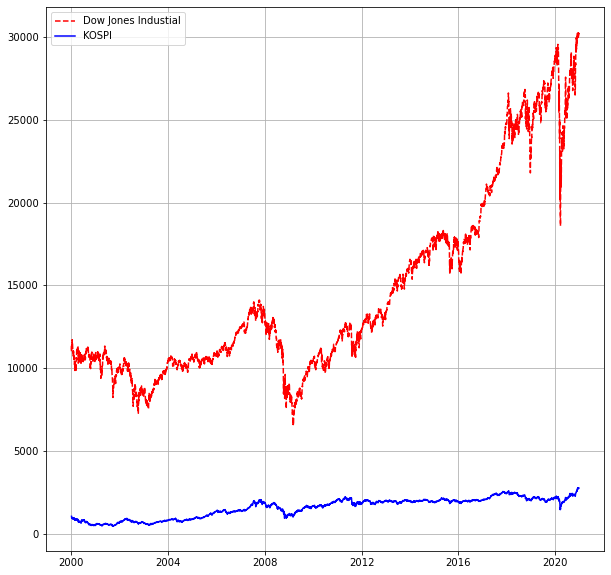

In [29]:
# KOSPI와 다우존스 지수 비교

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

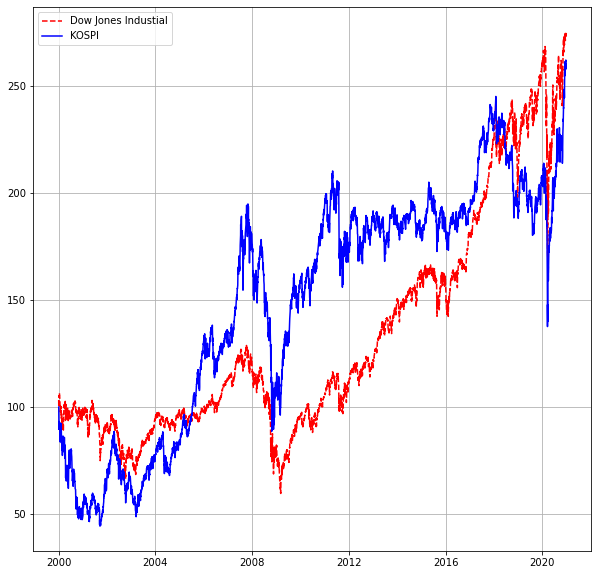

In [30]:
# 지수화 비교

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(d.index, d, 'r--', label='Dow Jones Industial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

---

In [32]:
print(len(dow))
print(len(kospi))

5279
5165


In [31]:
# 산점도 분석
# plt.scatter(dow, kospi, marker='.')    <-- 오류남(길이가 다르기 때문에)

In [33]:
import pandas as pd
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-12-17,30303.369141,2770.429932
2020-12-18,30179.050781,2772.179932
2020-12-21,30216.449219,2778.649902


In [34]:
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-12-17,30303.369141,2770.429932
2020-12-18,30179.050781,2772.179932
2020-12-21,30216.449219,2778.649902


In [35]:
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-12-17,30303.369141,2770.429932
2020-12-18,30179.050781,2772.179932
2020-12-21,30216.449219,2778.649902


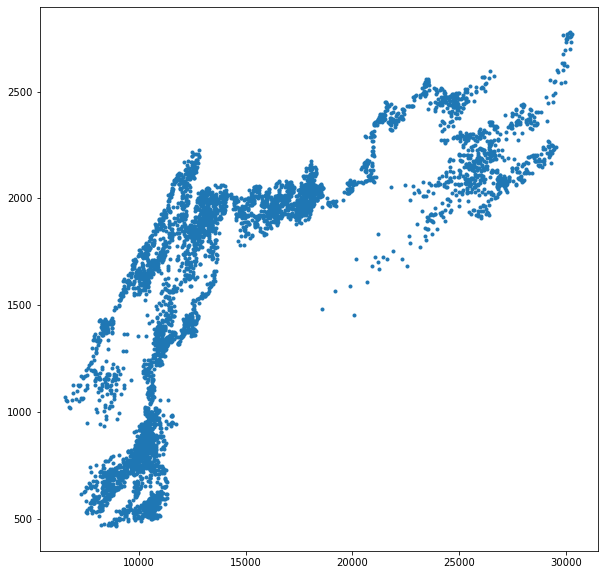

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df.DOW, df.KOSPI, marker='.')

---

In [52]:
#!pip install scipy

#### * 선형 회귀 모델 Yi = α+ βXi + εi 
    model =  stats.linregress(독립변수 x, 종속변수 y)
#### * 회귀 함수 E(Y) = α+ βXi 

In [37]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07697851247693889, intercept=456.18044981304706, rvalue=0.7557568867898893, pvalue=0.0, stderr=0.0009048382226107708)

* slope = 기울기  
* intercept = y절편  
* rvalue = r값(상관계수)  ----> E(Y) = α+βXi = 456.18+0.08*x 
* pvalue = p값  
* stderr = 표준편차  

---

### 7. 상관계수에 따른 리스크 완화

In [38]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.755757
KOSPI,0.755757,1.000000


In [39]:
# 상관계수
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.7557568867898893

In [40]:
# 결정계수(R-squared) = 상관계수의 제곱
r_squared = r_value**2
r_squared

0.5711684719303455

### * 다우존스 지수와 KOSPI의 회귀 분석

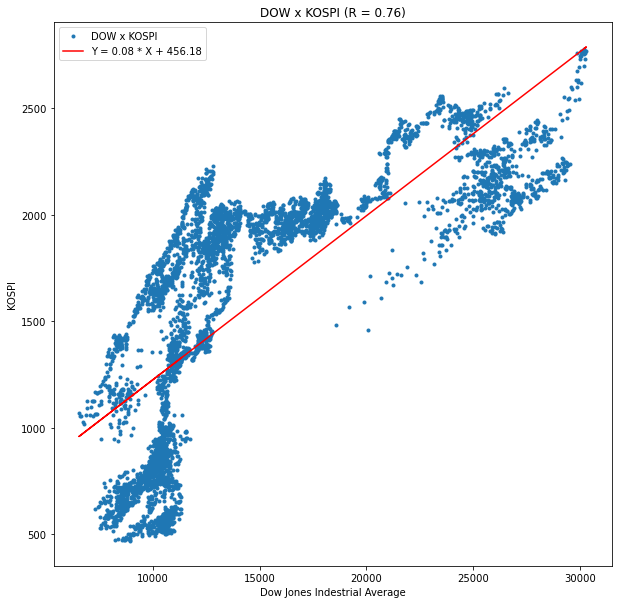

In [41]:
regr = stats.linregress(df.DOW, df.KOSPI)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(10,10))
plt.plot(df.DOW, df.KOSPI, '.')
plt.plot(df.DOW, regr.slope * df.DOW + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Indestrial Average')
plt.ylabel('KOSPI')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


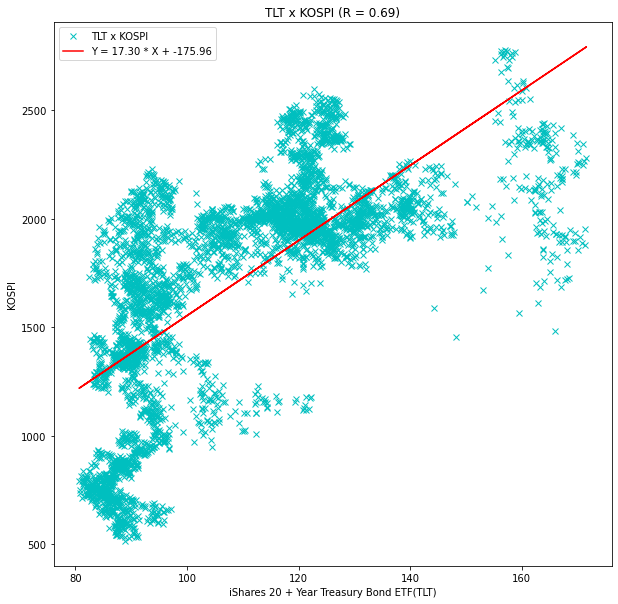

In [51]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

tlt = pdr.get_data_yahoo('TLT', '2002-07-30')
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

df = pd.DataFrame({'X':tlt['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(10,10))
plt.plot(df.X, df.Y, 'cx')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('iShares 20 + Year Treasury Bond ETF(TLT)')
plt.ylabel('KOSPI')
plt.show()

* DOW와 KOSPI 지수의 상관계수는 0.76  
* TLT와 KOSPI 지수의 상관계수는 0.69  
  
    ----> 만약 국내주식에 투자했다면 큰 차이는 아니지만 미국채권(TLT)에 분산 투자하는 것이 리스크 완화에 도움이 된다